In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df_noise1 = pd.read_excel("DatosInterferometria/ruido1.xlsx")
df_noise2 = pd.read_excel("DatosInterferometria/ruido2.xlsx")

In [3]:
from utils.clean_to_num_df import procesar_owon

metadata1, data_noise1 = procesar_owon(df_noise1)
metadata2, data_noise2 = procesar_owon(df_noise2)

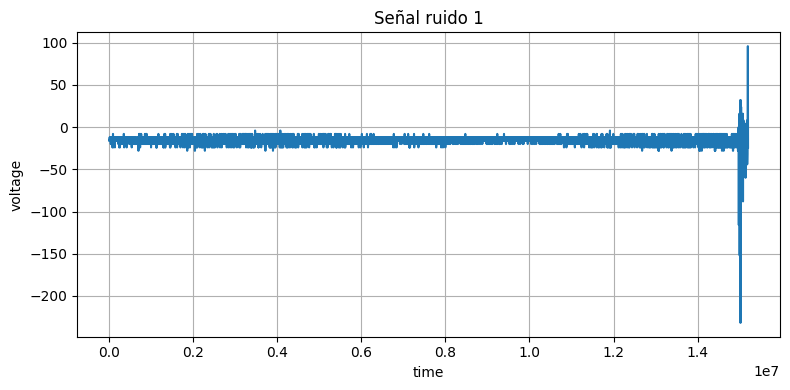

In [4]:
from utils.plot_df import plot_df

plot_df(data_noise1, "time", "voltage", title="Señal ruido 1")

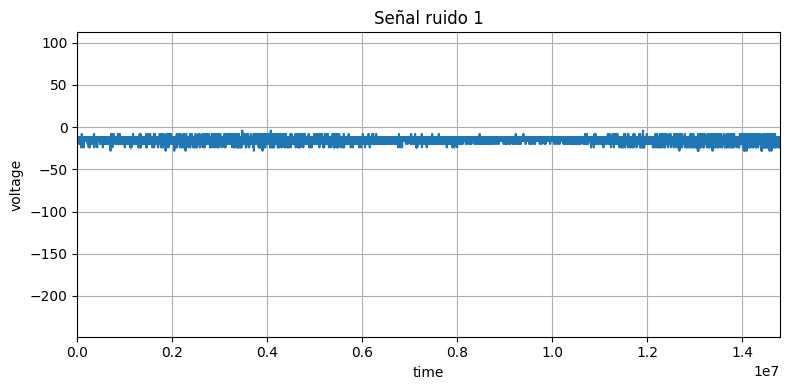

In [5]:
plot_df(data_noise1, "time", "voltage", xlim=[0,1.48e7], title="Señal ruido 1")

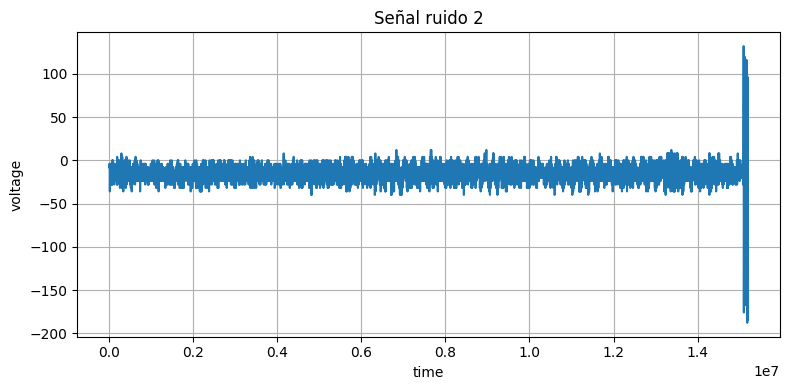

In [6]:
plot_df(data_noise2, "time", "voltage", title="Señal ruido 2")

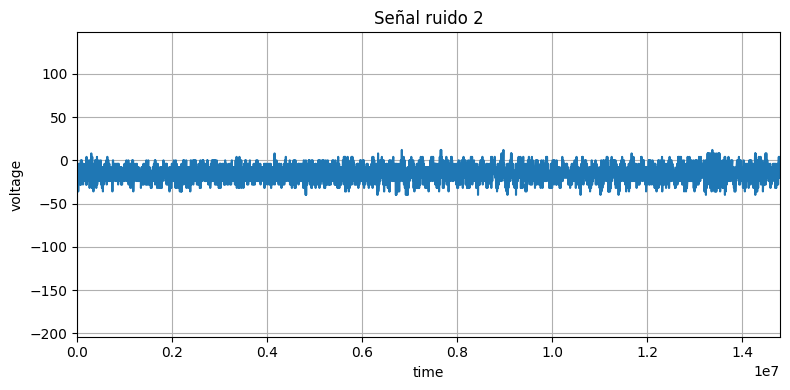

In [7]:
plot_df(data_noise2, "time", "voltage", xlim=[0,1.48e7],  title="Señal ruido 2")

In [8]:
cl_data_noise1 = data_noise1[data_noise1<=1.48e7]
cl_data_noise2 = data_noise2[data_noise2<=1.48e7]

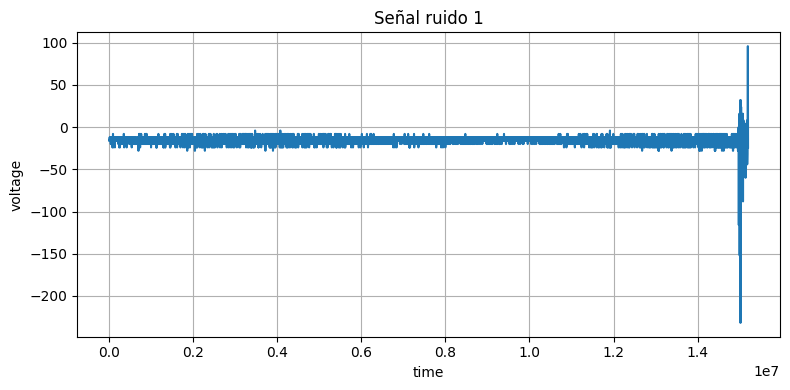

In [9]:
plot_df(data_noise1, "time", "voltage", title="Señal ruido 1")

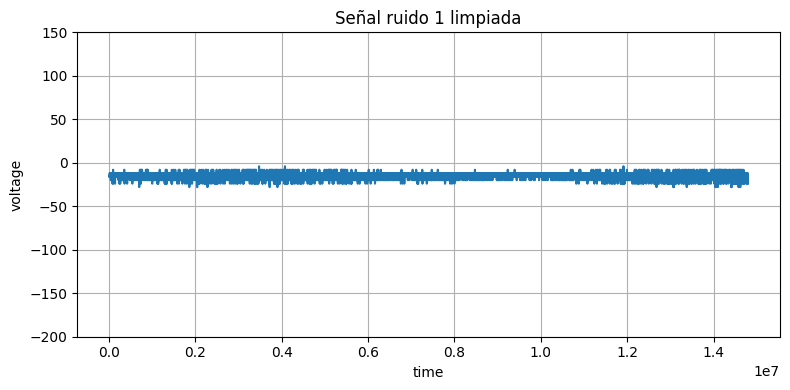

In [10]:
plot_df(cl_data_noise1, "time", "voltage", ylim=[-200,150], title="Señal ruido 1 limpiada")

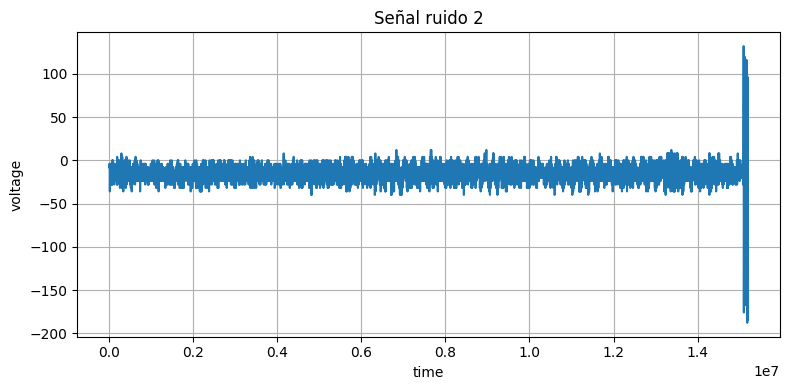

In [11]:
plot_df(data_noise2, "time", "voltage", title="Señal ruido 2")

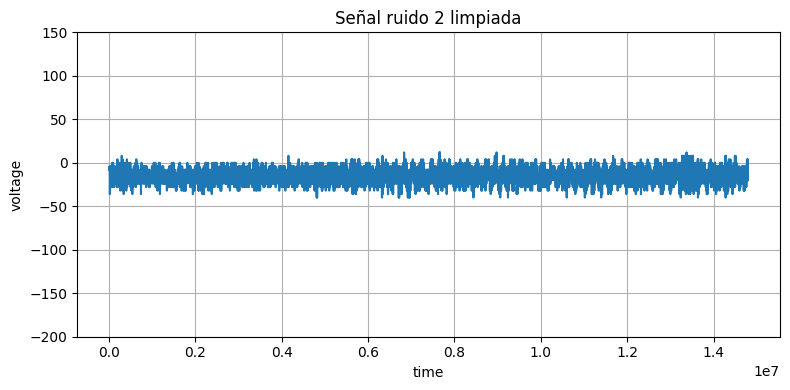

In [12]:
plot_df(cl_data_noise2, "time", "voltage", ylim=[-200,150], title="Señal ruido 2 limpiada")

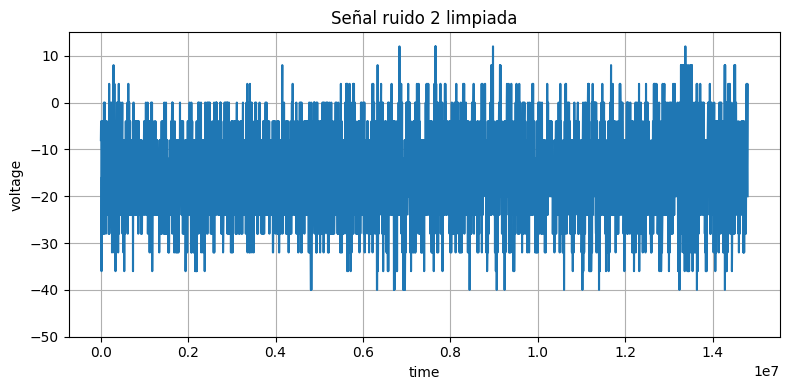

In [13]:
plot_df(cl_data_noise2, "time", "voltage", ylim=[-50,15], title="Señal ruido 2 limpiada")

Luego de limpiar los valores asociados al toque del botón que afecta ampliamente la señal, se debe centrar en 0 los dos archivos de ruido para lo cuál se define el promedio de cada uno y luego se hace la translación respecto al 0. Luego se debe definir los valores de los picos superiores e inferiores para determinar el aporte real del ruido.

In [14]:
from utils.calibrate_df import centering_voltage

center_noise1 = centering_voltage(cl_data_noise1)

 Valor central original -15.400000229477882


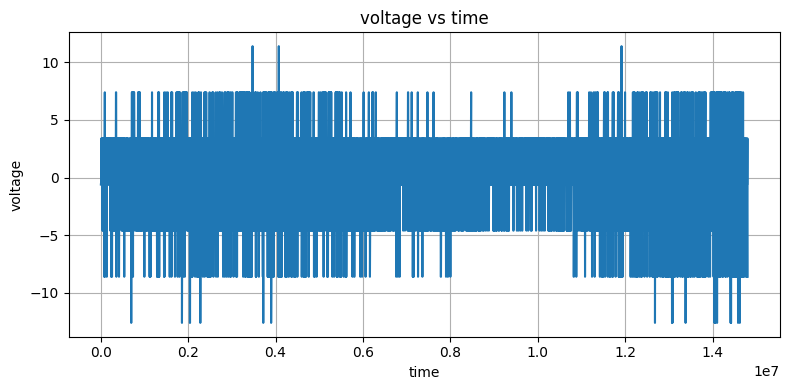

In [15]:
plot_df(center_noise1, "time", "voltage")

Ahora bien, para determinar los aportes que hace sin tener que calcular todos los valores de máximos y mínimos, se puede hacer un corte sobre el 0 y calcular el promedio de todos los valores mayores que 0 y todos los valores menores que 0, este sería también el promedio de los máximos y el promedio de los mínimos respectivamente.

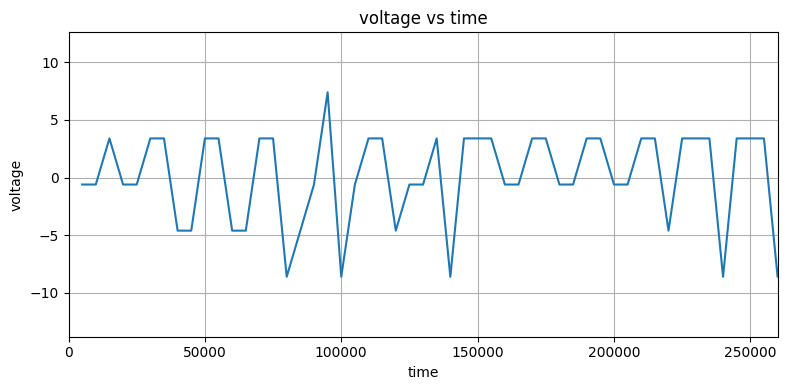

In [16]:
plot_df(center_noise1, "time", "voltage", xlim=[0.0, 0.26e6])

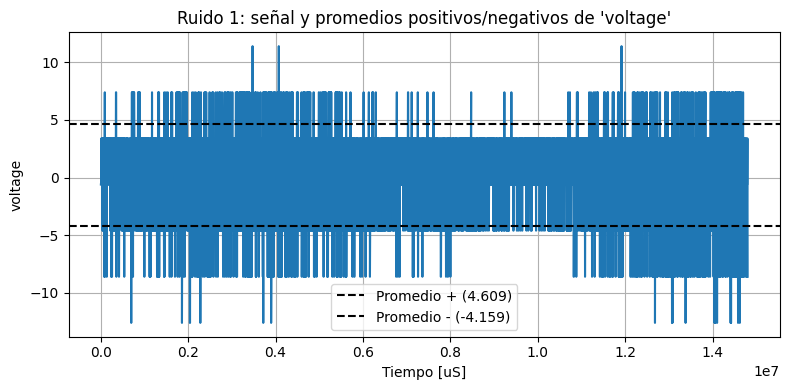

In [17]:
from utils.calibrate_df import mean_pos_neg

disp_neg_r1, disp_pos_r1 = mean_pos_neg(center_noise1, "voltage", "Ruido 1")

In [18]:
center_noise2 = centering_voltage(cl_data_noise2)

 Valor central original -15.023684434396657


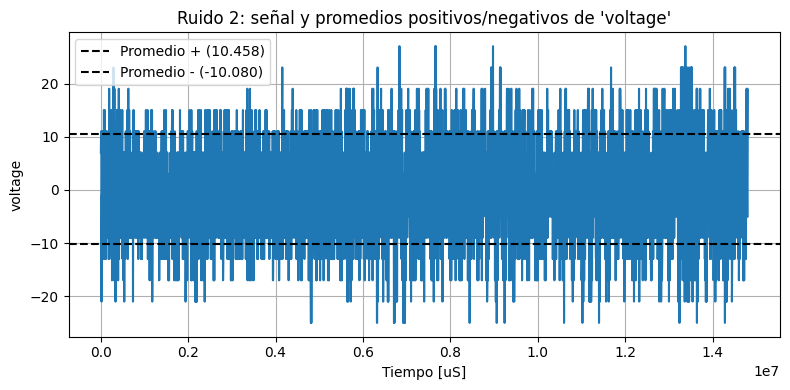

In [19]:
disp_neg_r2, disp_pos_r2 = mean_pos_neg(center_noise2, "voltage", "Ruido 2")

Luego usamos el promedio de los dos valores de ruido para la resta de los demás

In [20]:
desp_neg = (disp_neg_r2 + disp_neg_r1) / 2
desp_pos = (disp_pos_r1 + disp_pos_r2) / 2

print(desp_neg, desp_pos)

-7.119562243209668 7.533716067144812


In [21]:
df_do1 = pd.read_excel("DatosInterferometria/do1.xlsx")
df_do2 = pd.read_excel("DatosInterferometria/do2.xlsx")
df_do3 = pd.read_excel("DatosInterferometria/do3.xlsx")
df_do4 = pd.read_excel("DatosInterferometria/do4.xlsx")
df_do5 = pd.read_excel("DatosInterferometria/do5.xlsx")
df_do6 = pd.read_excel("DatosInterferometria/do6.xlsx")

In [22]:
metado1, data_do1 = procesar_owon(df_do1)
metado2, data_do2 = procesar_owon(df_do2)
metado3, data_do3 = procesar_owon(df_do3)
metado4, data_do4 = procesar_owon(df_do4)
metado5, data_do5 = procesar_owon(df_do5)
metado6, data_do6 = procesar_owon(df_do6)

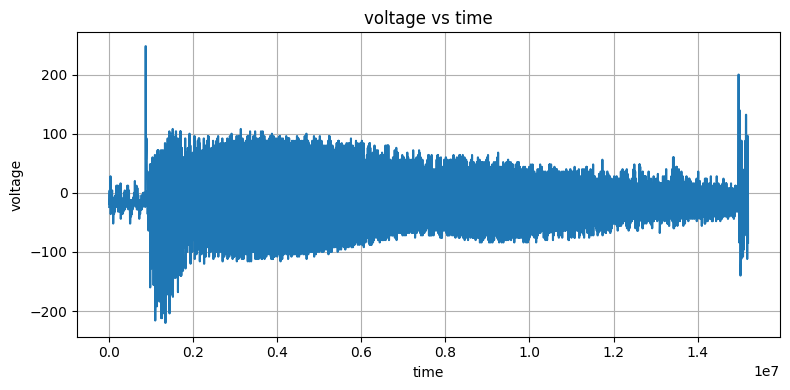

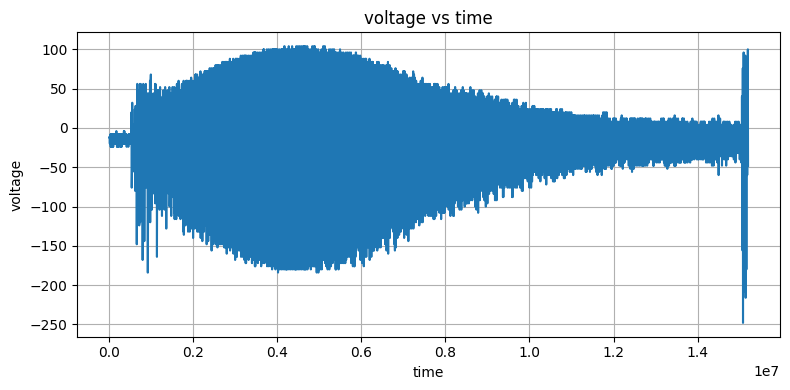

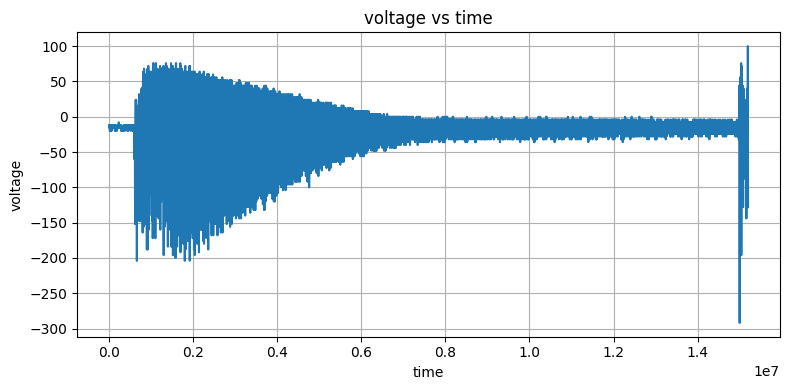

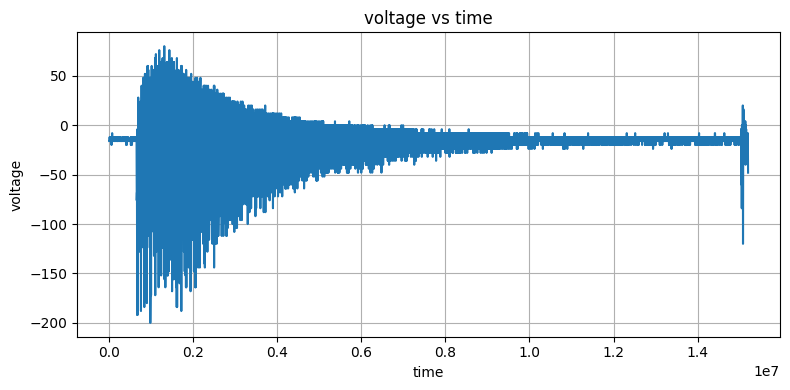

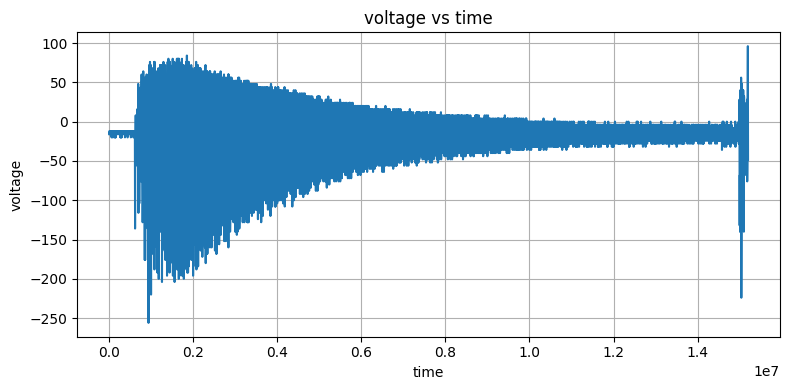

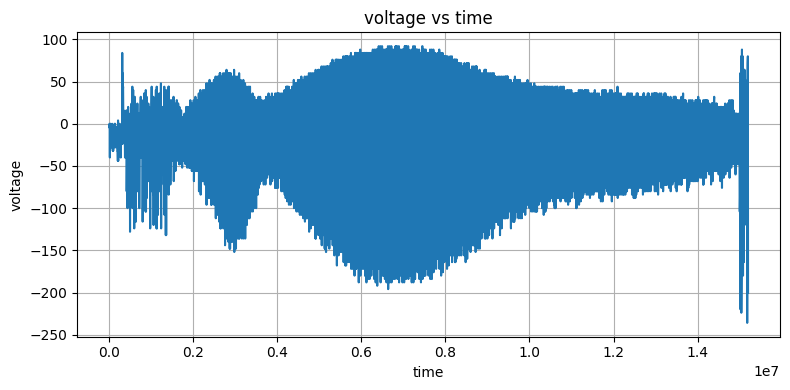

In [23]:
dfs_do = [data_do1, data_do2, data_do3, data_do4, data_do5, data_do6]

for df in dfs_do:
    plot_df(df, "time", "voltage")

Es necesario según se muestra procesar cada uno por separado, debido a que el tiempo en el que las vibraciones comienzan parece ser diferente para todas y también es necesario definir el centro de la vibración respecto a ese cero local, para luego reposicionar en el 0 la vibración.

El hecho de que el zero local vuelva a ser el punto de equilibrio luego de que la vibración va desapareciendo muestra que la vibración tiene una clara orientación en los valores de voltaje que en este caso parecen tener una dirección negativa, la cuál es necesario interpretar físicamente con el sentido del golpe.

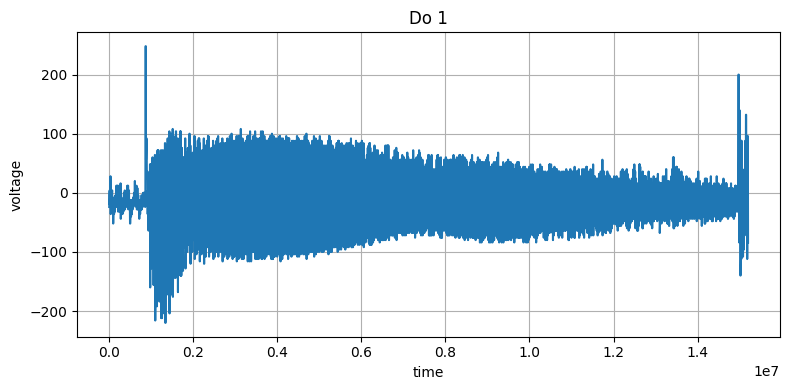

In [24]:
plot_df(data_do1, "time", "voltage", title="Do 1")

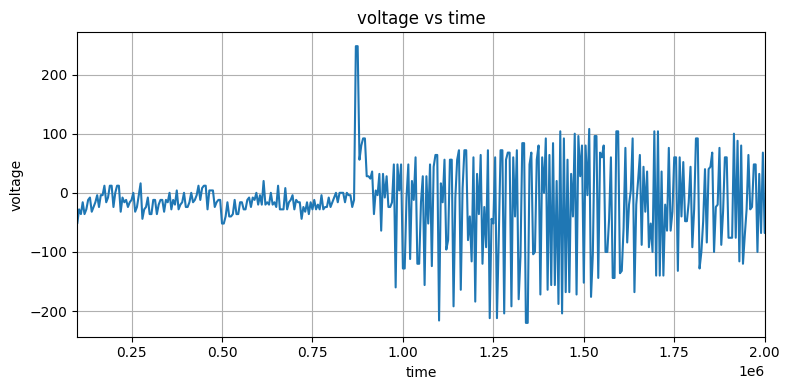

In [25]:
plot_df(data_do1, "time", "voltage", xlim = [0.1e6, 0.2e7])

In [26]:
zero_do1 = data_do1[data_do1["time"]<0.8e6]

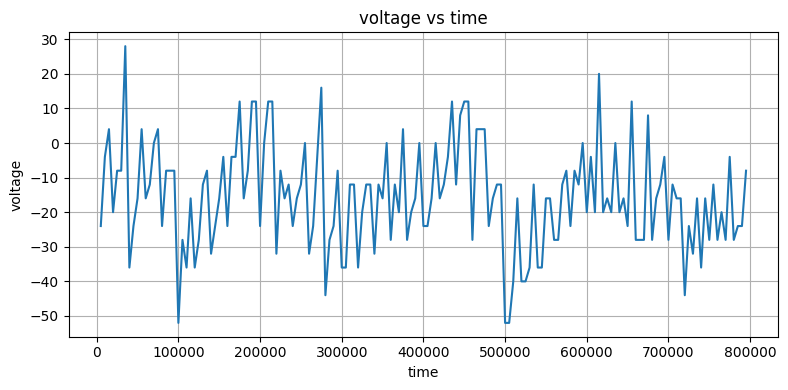

In [27]:
plot_df(zero_do1, "time", "voltage")

In [28]:
zero_do1f = centering_voltage(zero_do1)

 Valor central original -15.572327276070913


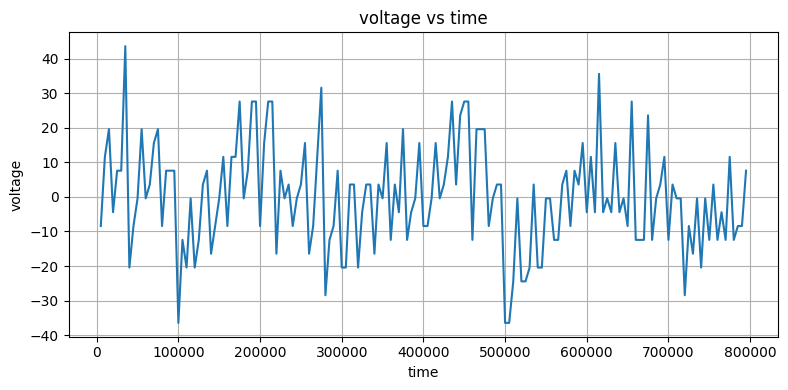

In [29]:
plot_df(zero_do1f)